In [49]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from util import get_data, plot_data
import indicators as ind

In [2]:
sd=dt.datetime(2010, 1, 1)
ed=dt.datetime(2011, 12, 31)

In [3]:
dates = pd.date_range(sd, ed)

In [4]:
dfStockPrice = get_data(['JPM'], dates, True, colname='Adj Close').drop(columns=['SPY'])

In [5]:
dfStockPriceNorm = dfStockPrice / dfStockPrice.iloc[0, :]
dfStockPrice = dfStockPrice.ffill().bfill()

dfStockPriceNorm.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=504, freq=None)

In [6]:
dates2 = dfStockPriceNorm.index

In [7]:
dates

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2011-12-22', '2011-12-23', '2011-12-24', '2011-12-25',
               '2011-12-26', '2011-12-27', '2011-12-28', '2011-12-29',
               '2011-12-30', '2011-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [8]:
dates2

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=504, freq=None)

In [9]:
lookback = 20
ema = ind.calculate_ema(dfStockPriceNorm, lookback)
ema

,JPM
2010-01-04,1.000000
2010-01-05,1.010276
2010-01-06,1.015667
2010-01-07,1.024212
2010-01-08,1.028713
...,...
2011-12-23,0.769023
2011-12-27,0.771073
2011-12-28,0.772067
2011-12-29,0.774713


In [10]:
dates = dfStockPriceNorm.index
orders = pd.DataFrame(0, index=dates, columns=['position'])
orders

,position
2010-01-04,0
2010-01-05,0
2010-01-06,0
2010-01-07,0
2010-01-08,0
...,...
2011-12-23,0
2011-12-27,0
2011-12-28,0
2011-12-29,0


In [11]:
for index, row in dfStockPriceNorm.iterrows():
    print (index)

2010-01-04 00:00:00
2010-01-05 00:00:00
2010-01-06 00:00:00
2010-01-07 00:00:00
2010-01-08 00:00:00
2010-01-11 00:00:00
2010-01-12 00:00:00
2010-01-13 00:00:00
2010-01-14 00:00:00
2010-01-15 00:00:00
2010-01-19 00:00:00
2010-01-20 00:00:00
2010-01-21 00:00:00
2010-01-22 00:00:00
2010-01-25 00:00:00
2010-01-26 00:00:00
2010-01-27 00:00:00
2010-01-28 00:00:00
2010-01-29 00:00:00
2010-02-01 00:00:00
2010-02-02 00:00:00
2010-02-03 00:00:00
2010-02-04 00:00:00
2010-02-05 00:00:00
2010-02-08 00:00:00
2010-02-09 00:00:00
2010-02-10 00:00:00
2010-02-11 00:00:00
2010-02-12 00:00:00
2010-02-16 00:00:00
2010-02-17 00:00:00
2010-02-18 00:00:00
2010-02-19 00:00:00
2010-02-22 00:00:00
2010-02-23 00:00:00
2010-02-24 00:00:00
2010-02-25 00:00:00
2010-02-26 00:00:00
2010-03-01 00:00:00
2010-03-02 00:00:00
2010-03-03 00:00:00
2010-03-04 00:00:00
2010-03-05 00:00:00
2010-03-08 00:00:00
2010-03-09 00:00:00
2010-03-10 00:00:00
2010-03-11 00:00:00
2010-03-12 00:00:00
2010-03-15 00:00:00
2010-03-16 00:00:00


In [12]:
for day in range(len(dates)):
    print(day)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
ema

,JPM
2010-01-04,1.000000
2010-01-05,1.010276
2010-01-06,1.015667
2010-01-07,1.024212
2010-01-08,1.028713
...,...
2011-12-23,0.769023
2011-12-27,0.771073
2011-12-28,0.772067
2011-12-29,0.774713


In [14]:
dfStockPriceNorm

,JPM
2010-01-04,1.000000
2010-01-05,1.019574
2010-01-06,1.024957
2010-01-07,1.045265
2010-01-08,1.042819
...,...
2011-12-23,0.803523
2011-12-27,0.790555
2011-12-28,0.781502
2011-12-29,0.799853


In [15]:
dfStockPriceNorm / ema

,JPM
2010-01-04,1.000000
2010-01-05,1.009203
2010-01-06,1.009147
2010-01-07,1.020556
2010-01-08,1.013712
...,...
2011-12-23,1.044863
2011-12-27,1.025266
2011-12-28,1.012221
2011-12-29,1.032451


In [16]:
dfStockPriceNormCopy = dfStockPriceNorm.copy()
dfStockPriceNormCopy[ema > dfStockPriceNorm] = 1000

In [17]:
dfStockPriceNormCopy['JPM'].value_counts(bins=3)

(666.921, 1000.0]     260
(-0.237, 333.842]     244
(333.842, 666.921]      0
Name: JPM, dtype: int64

In [18]:
dfStockPriceNormCopy[ema < dfStockPriceNorm] = -1000

In [19]:
dfStockPriceNormCopy[ema == dfStockPriceNorm] = 0

In [20]:
dfStockPriceNormCopy

,JPM
2010-01-04,0.0
2010-01-05,-1000.0
2010-01-06,-1000.0
2010-01-07,-1000.0
2010-01-08,-1000.0
...,...
2011-12-23,-1000.0
2011-12-27,-1000.0
2011-12-28,-1000.0
2011-12-29,-1000.0


In [21]:
dfStockPriceNormCopy['JPM'].value_counts(bins=3)

(333.333, 1000.0]        260
(-1002.001, -333.333]    243
(-333.333, 333.333]        1
Name: JPM, dtype: int64

In [22]:
dfStockPriceNormCopy[dfStockPriceNormCopy == -1000] = -1

In [23]:
dfStockPriceNormCopy[dfStockPriceNormCopy == 1000] = 1

In [24]:
dfStockPriceNormCopy['JPM'].value_counts(bins=3)

(0.333, 1.0]        260
(-1.003, -0.333]    243
(-0.333, 0.333]       1
Name: JPM, dtype: int64

In [25]:
for index, row in dfStockPriceNorm.iterrows():
    print(dfStockPriceNormCopy.loc[index][0])

0.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.

In [26]:
momentum = ind.calculate_momentum(dfStockPriceNorm, lookback).bfill()
momentum

,JPM
2010-01-04,-0.053585
2010-01-05,-0.053585
2010-01-06,-0.053585
2010-01-07,-0.053585
2010-01-08,-0.053585
...,...
2011-12-23,0.178751
2011-12-27,0.132492
2011-12-28,0.143164
2011-12-29,0.078878


In [27]:
std = ind.calculate_std(dfStockPriceNorm, lookback)
sma = ind.calculate_sma(dfStockPriceNorm, lookback)
bbp, top_band, bottom_band = ind.calculate_BB_data(dfStockPriceNorm, lookback, sma, std)

In [28]:
momentum.ffill().bfill()

,JPM
2010-01-04,-0.053585
2010-01-05,-0.053585
2010-01-06,-0.053585
2010-01-07,-0.053585
2010-01-08,-0.053585
...,...
2011-12-23,0.178751
2011-12-27,0.132492
2011-12-28,0.143164
2011-12-29,0.078878


In [29]:
momentum

,JPM
2010-01-04,-0.053585
2010-01-05,-0.053585
2010-01-06,-0.053585
2010-01-07,-0.053585
2010-01-08,-0.053585
...,...
2011-12-23,0.178751
2011-12-27,0.132492
2011-12-28,0.143164
2011-12-29,0.078878


In [30]:
for index, row in dfStockPriceNorm.iterrows():
    print(momentum.bfill().loc[index][0])

-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.05358453633471982
-0.0777537796976242
-0.12676056338028174
-0.14489700374531833
-0.15626466447677134
-0.13794726930320145
-0.1060752169720347
-0.11821843165126744
-0.12854797091250303
-0.08279337652987762
-0.07485465116279089
-0.0688405797101449
-0.012671321437807026
0.04337349397590362
0.01711229946524062
0.06272157076629403
0.03331556503198296
0.06293149229952211
0.07431340872374803
0.050264550264550456
0.024043433298862604
0.040593286494925884
0.11645708037178792
0.11223651793046807
0.12513904338153514
0.11824139814309143
0.11084142394822005
0.1058570660934981
0.10578

0.0788778877887788
0.09161073825503374


In [31]:
for index, row in dfStockPriceNorm.iterrows():
    print(row[0])

1.0
1.0195742598482995
1.0249571813065819
1.0452654758991926
1.0428186934181551
1.0393931979447026
1.0149253731343284
1.0327868852459017
1.043063371666259
1.0195742598482995
1.0100318081722537
1.0129679471494983
0.9461707854171765
0.9138732566674823
0.915096647908001
0.8972351357964278
0.918032786885246
0.9214582823586983
0.9087350134573037
0.9248837778321507
0.9464154636652802
0.9402985074626866
0.895033031563494
0.8938096403229754
0.879862980181062
0.8960117445559089
0.9072669439686812
0.9106924394421336
0.9089796917054074
0.935160264252508
0.9344262295081968
0.9432346464399315
0.9341815512600931
0.9535111328602888
0.9307560557866406
0.9535111328602888
0.9486175678982139
0.9794470271592857
0.9762662099339369
0.9713726449718622
0.9691705407389284
0.9784683141668706
0.9992659652556889
0.9941277220455103
0.9899681918277466
1.00195742598483
1.0078297039393198
1.0070956691950086
1.0051382432101785
1.0092977734279422
1.022021042329337
1.0185955468558847
1.0141913383900172
1.020797651088818

In [32]:
bbp.bfill()

,JPM
2010-01-04,0.241528
2010-01-05,0.241528
2010-01-06,0.241528
2010-01-07,0.241528
2010-01-08,0.241528
...,...
2011-12-23,0.785523
2011-12-27,0.674845
2011-12-28,0.582428
2011-12-29,0.747326


In [33]:
np.nan

nan

In [34]:
-.2 == np.nan

False

In [35]:
df= pd.DataFrame(0, index=dates, columns=['order type', 'position', 'actual shares'])

In [36]:
df

,order type,position,actual shares
2010-01-04,0,0,0
2010-01-05,0,0,0
2010-01-06,0,0,0
2010-01-07,0,0,0
2010-01-08,0,0,0
...,...,...,...
2011-12-23,0,0,0
2011-12-27,0,0,0
2011-12-28,0,0,0
2011-12-29,0,0,0


In [37]:
df2 = df.copy().drop(columns=['order type', 'position'])

In [38]:
df2

,actual shares
2010-01-04,0
2010-01-05,0
2010-01-06,0
2010-01-07,0
2010-01-08,0
...,...
2011-12-23,0
2011-12-27,0
2011-12-28,0
2011-12-29,0


In [93]:
df['order type',3] = 'BUY'
df

,order type,position,actual shares,"(order type, 3)"
2010-01-04,BUY,0,0,BUY
2010-01-05,0,0,0,BUY
2010-01-06,0,0,0,BUY
2010-01-07,BUY,0,0,BUY
2010-01-08,0,0,0,BUY
...,...,...,...,...
2011-12-23,0,0,0,BUY
2011-12-27,0,0,0,BUY
2011-12-28,0,0,0,BUY
2011-12-29,0,0,0,BUY


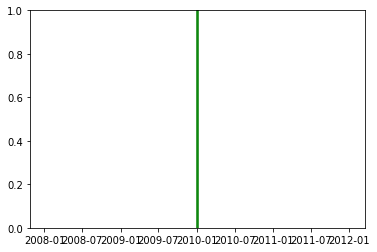

In [94]:
for index, row in df.iterrows():
        if df.loc[index]['order type'] == 'BUY':
            plt.axvline(x=index, color='g', linestyle='-')
        elif df.loc[index]['order type'] == 'SELL':
            plt.axvline(x=index, color='r', linestyle='-')

In [61]:
v = vertical.index[vertical=='BUY']

In [67]:
v['order type']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

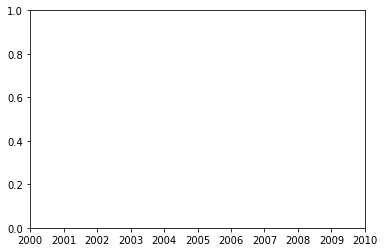

In [65]:
for index, row in df.iterrows():
        if v.loc[index]['order type'] == 'BUY':
            plt.axvline(x=index, color='g', linestyle='-')
        elif v.loc[index]['Order'] == 'SELL':
            plt.axvline(x=index, color='r', linestyle='-')